In [2]:
import scipy
from scipy import spatial
import numpy as np
import matplotlib.pyplot as plt

In [12]:
test_num = 50
X_test = np.expand_dims(np.linspace(-5, 5, test_num), axis=1)
K = np.exp(-0.5*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean'))
u = np.zeros(test_num)

In [13]:
Y_test = np.random.multivariate_normal(u, K, 560)

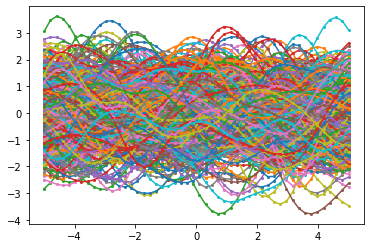

In [14]:
for i in range(560):
    plt.plot(X_test, Y_test[i], linestyle='-', marker='o', markersize=2)

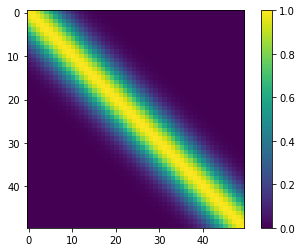

In [15]:
plt.imshow(K)
plt.colorbar()

In [16]:
X = np.expand_dims([-4, -3, -1, 0, 1.5], axis=1)
Y = np.expand_dims([-2, 0, 1, 2, -1], axis=1)
K = np.exp(-0.5*spatial.distance.cdist(X, X, metric='sqeuclidean'))
K_test_K = np.exp(-0.5*spatial.distance.cdist(X_test, X, metric='sqeuclidean'))
K_test_K_test = np.exp(-0.5*spatial.distance.cdist(X_test, X_test, metric='sqeuclidean'))
KK_test = np.exp(-0.5*spatial.distance.cdist(X, X_test, metric='sqeuclidean'))
K_inv = np.linalg.inv(K)

In [17]:
u = np.matmul(np.matmul(K_test_K, K_inv), Y).flatten()
cov = K_test_K_test - np.matmul(np.matmul(K_test_K, K_inv), KK_test)

In [18]:
Y_test = np.random.multivariate_normal(u, cov, 30)

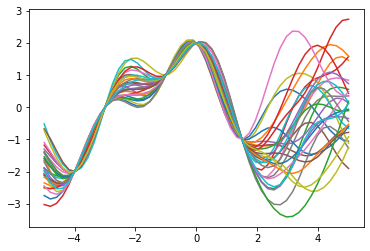

In [19]:
for i in range(30):
    plt.plot(X_test, Y_test[i], linestyle='-')

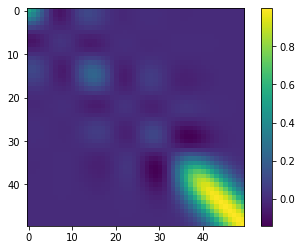

In [20]:
plt.imshow(cov)
plt.colorbar()

In [392]:
X = np.expand_dims(np.random.uniform(-4, 4, 500), axis=1)
Y = np.expand_dims(np.sin(X).flatten() + np.sqrt(0.1)*np.random.randn(500), axis=1) 

In [393]:
noise = 0.1
L = np.linalg.cholesky(np.exp(-0.5*spatial.distance.cdist(X, X, metric='sqeuclidean')) + np.diag(np.zeros(500) + noise))

In [394]:
alpha = np.linalg.solve(L.T, np.linalg.solve(L, Y))

In [395]:
def mean_var_pred(x_test):
    k_test = np.exp(-0.5*spatial.distance.cdist(x_test, X, metric='sqeuclidean')).T
    u = np.matmul(k_test.T, alpha)
    v = np.linalg.solve(L, k_test)
    k_test_k_test = np.exp(-0.5*spatial.distance.cdist(x_test, x_test, metric='sqeuclidean'))
    Var = k_test_k_test - np.matmul(v.T, v) + noise
    return u, Var

In [396]:
x_test = np.linspace(-5, 5, 500)
y_pred = np.zeros(500)
y_pred_noise = np.zeros(500)
for i in range(500):
    y_pred[i], cov = mean_var_pred([[x_test[i]]])
    y_pred_noise[i] = np.random.multivariate_normal([y_pred[i]], cov, 1)

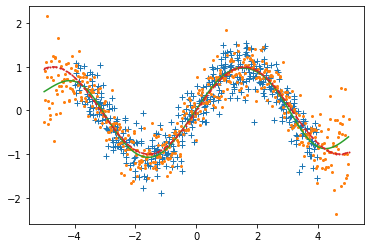

In [397]:
plt.plot(X, Y, linestyle='', marker='+')
plt.plot(x_test, y_pred_noise, linestyle='', marker='o', markersize=2)
plt.plot(x_test, y_pred, linestyle='-')
plt.plot(np.linspace(-5, 5, 100), np.sin(np.linspace(-5, 5, 100)), linestyle='--', marker='o', markersize=1)